In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [32]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [33]:
def get_recent_form(data, team, n_matches=5):
    team_data = data[(data['home_team'] == team) | (data['away_team'] == team)].tail(n_matches)
    wins = 0
    draws = 0
    losses = 0
    for _, row in team_data.iterrows():
        if row['result'] == 1 and row['home_team'] == team:
            wins += 1
        elif row['result'] == -1 and row['away_team'] == team:
            wins += 1
        elif row['result'] == 0:
            draws += 1
        else:
            losses += 1

    return wins / n_matches, draws / n_matches, losses / n_matches

In [34]:
data = pd.read_csv("../data/csv_datasets/epl/all_seasons.csv")

In [35]:
le_home = LabelEncoder()
le_away = LabelEncoder()

In [36]:
data['home_team'] = le_home.fit_transform(data['home_team'])
data.head()

,fixture_id,season,date,stadium,game_week,home_team,away_team,home_goals,away_goals,ht_home_goals,...,away_shots,away_fouls,away_corners,away_offsides,away_possession,away_yellow_cards,away_red_cards,away_goalkeeper_saves,away_attempted_passes,away_successful_passes
0,17317,2016,2017-05-21T14:00:00+00:00,Emirates Stadium,Regular Season - 38,0,Everton,3,1,2,...,22,15,6,1,51,4,0,6,428,366
1,17318,2016,2017-05-21T14:00:00+00:00,Turf Moor,Regular Season - 38,5,West Ham,1,2,1,...,14,14,5,3,56,2,0,0,489,374
2,17319,2016,2017-05-21T14:00:00+00:00,Stamford Bridge,Regular Season - 38,7,Sunderland,5,1,1,...,7,15,1,1,30,1,0,3,269,211
3,17320,2016,2017-05-21T14:00:00+00:00,KCOM Stadium,Regular Season - 38,12,Tottenham,1,7,0,...,19,5,3,0,66,0,0,3,600,520
4,17321,2016,2017-05-21T14:00:00+00:00,King Power Stadium,Regular Season - 38,14,Bournemouth,1,1,0,...,10,10,1,1,52,1,0,4,446,350


In [37]:
data['away_team'] = le_away.fit_transform(data['away_team'])
data.head()

,fixture_id,season,date,stadium,game_week,home_team,away_team,home_goals,away_goals,ht_home_goals,...,away_shots,away_fouls,away_corners,away_offsides,away_possession,away_yellow_cards,away_red_cards,away_goalkeeper_saves,away_attempted_passes,away_successful_passes
0,17317,2016,2017-05-21T14:00:00+00:00,Emirates Stadium,Regular Season - 38,0,9,3,1,2,...,22,15,6,1,51,4,0,6,428,366
1,17318,2016,2017-05-21T14:00:00+00:00,Turf Moor,Regular Season - 38,5,30,1,2,1,...,14,14,5,3,56,2,0,0,489,374
2,17319,2016,2017-05-21T14:00:00+00:00,Stamford Bridge,Regular Season - 38,7,25,5,1,1,...,7,15,1,1,30,1,0,3,269,211
3,17320,2016,2017-05-21T14:00:00+00:00,KCOM Stadium,Regular Season - 38,12,27,1,7,0,...,19,5,3,0,66,0,0,3,600,520
4,17321,2016,2017-05-21T14:00:00+00:00,King Power Stadium,Regular Season - 38,14,2,1,1,0,...,10,10,1,1,52,1,0,4,446,350


In [38]:
data['game_week'] = data['game_week'].str.extract('(\d+)').astype(int)
data.head()

,fixture_id,season,date,stadium,game_week,home_team,away_team,home_goals,away_goals,ht_home_goals,...,away_shots,away_fouls,away_corners,away_offsides,away_possession,away_yellow_cards,away_red_cards,away_goalkeeper_saves,away_attempted_passes,away_successful_passes
0,17317,2016,2017-05-21T14:00:00+00:00,Emirates Stadium,38,0,9,3,1,2,...,22,15,6,1,51,4,0,6,428,366
1,17318,2016,2017-05-21T14:00:00+00:00,Turf Moor,38,5,30,1,2,1,...,14,14,5,3,56,2,0,0,489,374
2,17319,2016,2017-05-21T14:00:00+00:00,Stamford Bridge,38,7,25,5,1,1,...,7,15,1,1,30,1,0,3,269,211
3,17320,2016,2017-05-21T14:00:00+00:00,KCOM Stadium,38,12,27,1,7,0,...,19,5,3,0,66,0,0,3,600,520
4,17321,2016,2017-05-21T14:00:00+00:00,King Power Stadium,38,14,2,1,1,0,...,10,10,1,1,52,1,0,4,446,350


In [39]:
data['result'] = np.sign(data['home_goals'] - data['away_goals']).map({-1: 0, 0: 1, 1: 2})

In [40]:
scaling_factor = 2

data['home_recent_wins'] = data['home_team'].apply(lambda x: get_recent_form(data, x)[0]) * scaling_factor
data['home_recent_draws'] = data['home_team'].apply(lambda x: get_recent_form(data, x)[1]) * scaling_factor
data['home_recent_losses'] = data['home_team'].apply(lambda x: get_recent_form(data, x)[2]) * scaling_factor
data['away_recent_wins'] = data['away_team'].apply(lambda x: get_recent_form(data, x)[0]) * scaling_factor
data['away_recent_draws'] = data['away_team'].apply(lambda x: get_recent_form(data, x)[1]) * scaling_factor
data['away_recent_losses'] = data['away_team'].apply(lambda x: get_recent_form(data, x)[2]) * scaling_factor

In [41]:
features = [
    'game_week',
    'home_team',
    'away_team',
    'home_shots_on_target',
    'home_shots',
    'home_fouls',
    'home_corners',
    'home_offsides',
    'home_possession',
    'home_yellow_cards',
    'home_red_cards',
    'home_goalkeeper_saves',
    'home_attempted_passes',
    'home_successful_passes',
    'away_shots_on_target',
    'away_shots',
    'away_fouls',
    'away_corners',
    'away_offsides',
    'away_possession',
    'away_yellow_cards',
    'away_red_cards',
    'away_goalkeeper_saves',
    'away_attempted_passes',
    'away_successful_passes',
    'home_recent_wins',
    'home_recent_draws',
    'home_recent_losses',
    'away_recent_wins',
    'away_recent_draws',
    'away_recent_losses'
]

ml_features = data[features]

In [42]:
ml_target = data['result']

ml_target

0       2
1       0
2       2
3       0
4       1
       ..
2592    2
2593    2
2594    1
2595    2
2596    2
Name: result, Length: 2597, dtype: int64

In [43]:
ml_features_train, ml_features_test, ml_target_train, ml_target_test = train_test_split(ml_features, ml_target, test_size=0.2, random_state=42)

In [44]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Bagging Classifier', BaggingClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', xgb.XGBClassifier()),
    ('Naive Bayes', GaussianNB()),
]

In [45]:
results = []
for name, model in models:        
    model.fit(ml_features_train, ml_target_train)
    y_pred = model.predict(ml_features_test)
    acc = accuracy_score(ml_target_test, y_pred)
    prec = precision_score(ml_target_test, y_pred, average='macro')
    rec = recall_score(ml_target_test, y_pred, average='macro')
    f1 = f1_score(ml_target_test, y_pred, average='macro')
    results.append({'Model': name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-Score': f1})

In [46]:
results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)
print(results_df)

                        Accuracy  Precision    Recall  F1-Score
Model                                                          
Logistic Regression     0.611538   0.487718  0.509387  0.463749
Support Vector Machine  0.544231   0.396558  0.402838  0.350516
K-Nearest Neighbors     0.409615   0.380955  0.381202  0.371831
Decision Tree           0.609615   0.562822  0.557710  0.559163
Random Forest           0.638462   0.525838  0.545962  0.520294
Bagging Classifier      0.692308   0.638025  0.645034  0.639646
Gradient Boosting       0.771154   0.706202  0.693997  0.692238
XGBoost                 0.765385   0.708153  0.704946  0.704769
Naive Bayes             0.561538   0.501206  0.504736  0.493461


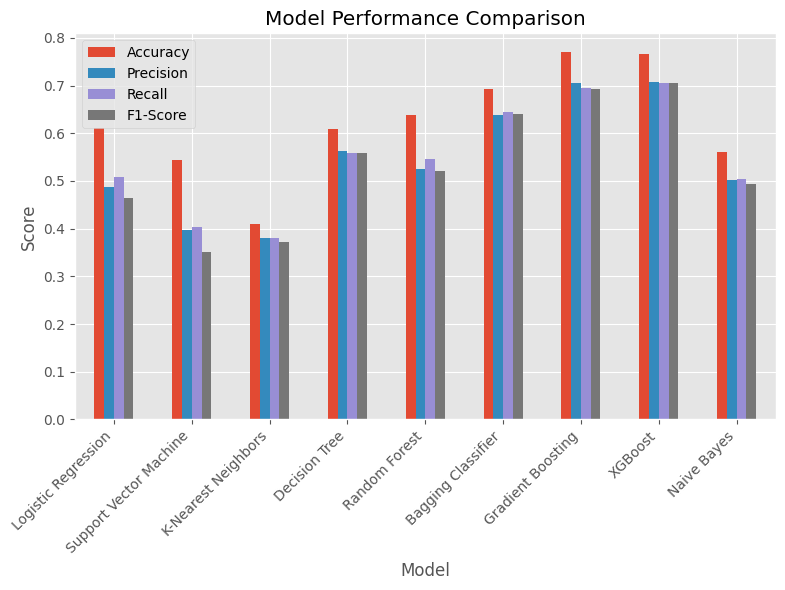

In [47]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))
results_df.plot(kind='bar', ax=ax)
ax.set(title='Model Performance Comparison', xlabel='Model', ylabel='Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

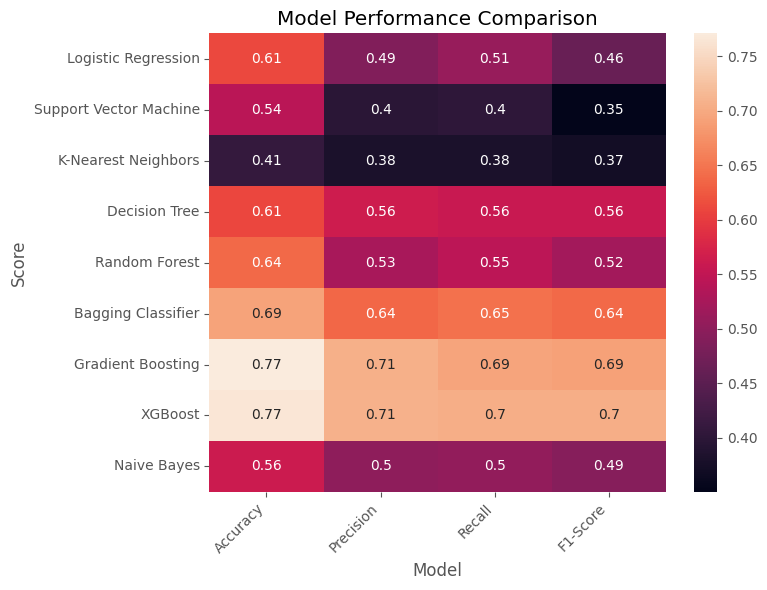

In [49]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(results_df, annot=True, ax=ax)
ax.set(title='Model Performance Comparison', xlabel='Model', ylabel='Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()